
# LUZ PATRICIA HERNÁNDEZ A01637277
Visualizing Data in Python 

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [2]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt





# Importing data

In [3]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            ="D:/uni 4/semanaTec_HerramientasComp/A01637277/TC1002S/NotebooksProfessor/"

In [4]:
# Dataset url
url = Ruta + "datasets/cartwheel/cartwheel.csv"

# Load the dataset
df = pd.read_csv(url)


# Exploring the content of the data set

Get a general 'feel' of the data


In [5]:
df.describe()



,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,52.000000,51.000000,52.000000,52.000000,51.000000,51.000000,52.000000,51.000000,52.000000
mean,26.500000,28.411765,1.500000,0.500000,68.971569,67.313725,85.576923,0.843137,7.173077
std,15.154757,5.755611,0.504878,0.504878,5.303812,5.624021,14.353173,0.367290,2.211566
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.000000,2.000000
25%,13.750000,25.000000,1.000000,0.000000,64.500000,63.000000,72.000000,1.000000,6.000000
50%,26.500000,27.000000,1.500000,0.500000,69.000000,66.000000,85.000000,1.000000,8.000000
75%,39.250000,30.000000,2.000000,1.000000,73.000000,72.000000,96.500000,1.000000,9.000000
max,52.000000,56.000000,2.000000,1.000000,79.500000,76.000000,115.000000,1.000000,10.000000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [6]:
# Number of times that each distinct value of a variable occurs in a data set
print(df.Glasses.value_counts())
df.GenderGroup.value_counts()

Glasses
Y    26
N    26
Name: count, dtype: int64


GenderGroup
1    26
2    26
Name: count, dtype: int64

In [7]:
# Proportion of each distinct value of a variable occurs in a data set
x=df.CompleteGroup.value_counts()

percentage= 100*x/x.sum()

percentage

CompleteGroup
1.0    84.313725
0.0    15.686275
Name: count, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [8]:
# Total number of observations
print("Hay ",df.shape[0], " observaciones")

# Total number of null observations
print("Observaciones nulas",df.Age.isnull().sum())

print("Observaciones válidas",df.Age.notnull().sum())

# Total number of counts (excluding missing values)





Hay  52  observaciones
Observaciones nulas 1
Observaciones válidas 51


# Histogram

It is often good to get a feel for the shape of the distribution of the data.

Text(0.5, 1.0, 'Histogram of Age')

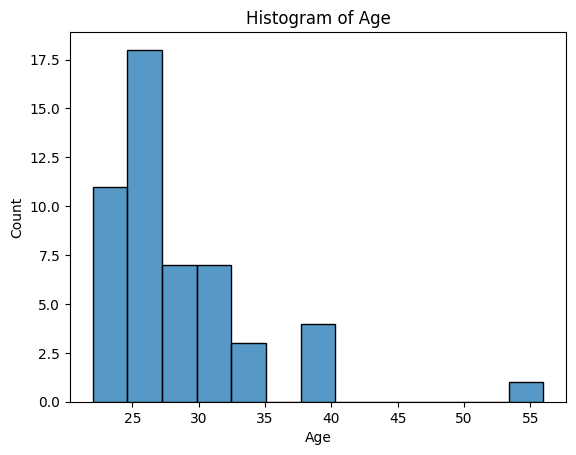

In [9]:
# Plot histogram of the total bill only

sns.histplot(df["Age"]).set_title("Histogram of Age")

In [10]:
# Plot distribution of the tips only



<function matplotlib.pyplot.show(close=None, block=None)>

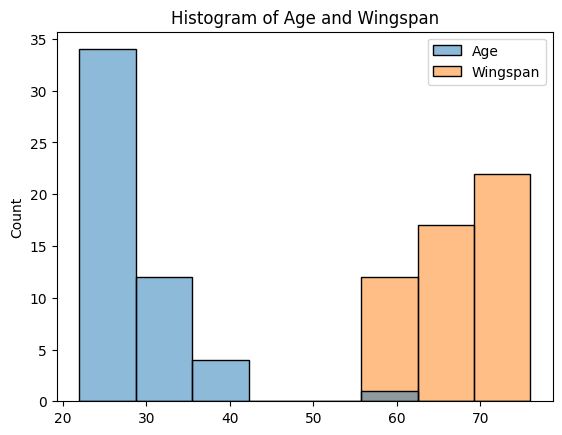

In [11]:
# Plot histogram of both the Age and the Wingspan

df2plot= df[["Age", "Wingspan"]]
sns.histplot(df2plot).set_title("Histogram of Age and Wingspan")
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

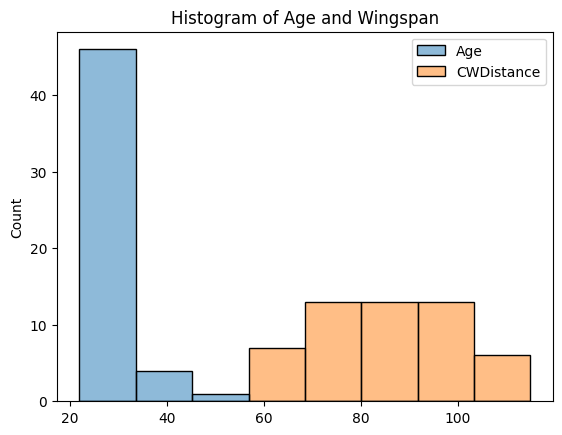

In [12]:
ageDistance= df[["Age", "CWDistance"]]
sns.histplot(ageDistance).set_title("Histogram of Age and Wingspan")
plt.show

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

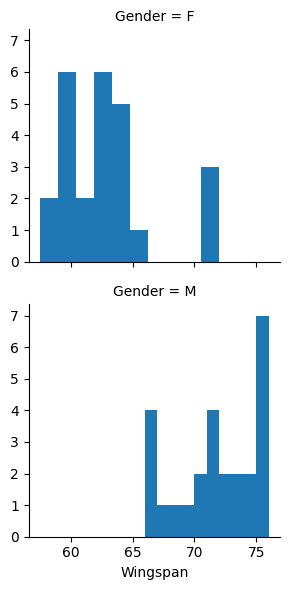

In [13]:
# Create histograms of the "Wingspan" grouped by "Gender"

g=sns.FacetGrid(df,row="Gender")
g=g.map(plt.hist,"Wingspan")
plt.show()


# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

<Axes: ylabel='CWDistance'>

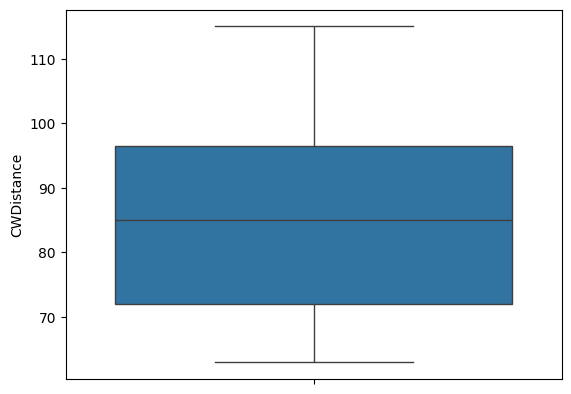

In [14]:
# Create the boxplot of the "total bill" amounts
sns.boxplot(df["CWDistance"]) #pulgadas de distancia


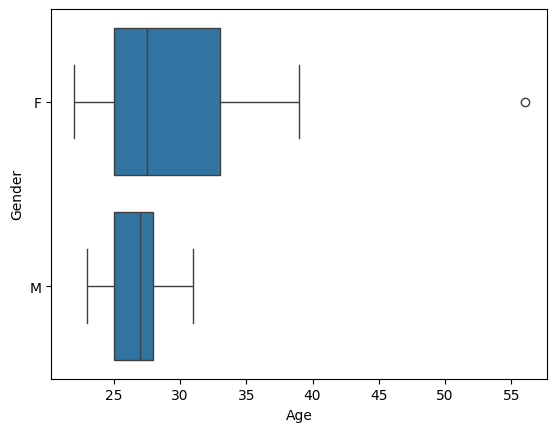

In [15]:
# Create the boxplot of the "tips" amounts

sns.boxplot(data=df, x="Age", y="Gender")
plt.show()

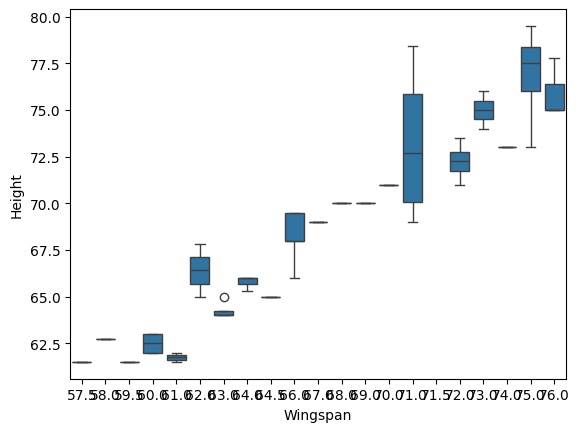

In [16]:
# Create the boxplots of the "Wingspan" and of the "Height" amounts

sns.boxplot(data=df, x="Wingspan", y="Height")
plt.show()

In [17]:
# Create the boxplots of the "Wingspan" and of the "tips" amounts


# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

In [18]:
# Create side-by-side boxplots of the "Height" grouped by "Gender"



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


In [19]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"



# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

<Axes: xlabel='Age', ylabel='CWDistance'>

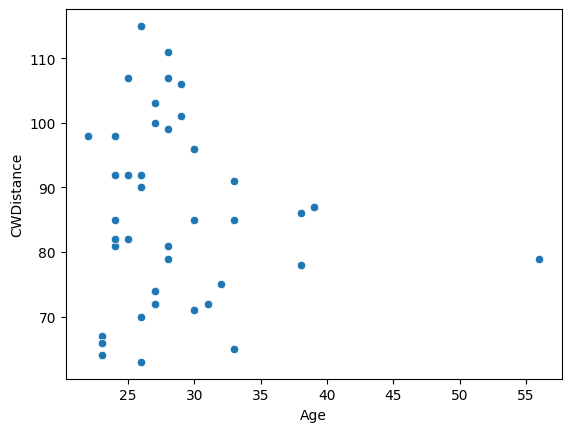

In [20]:
# scatter plot between two variables

sns.scatterplot(data=df, y="CWDistance", x="Age")

<Axes: xlabel='Wingspan', ylabel='Height'>

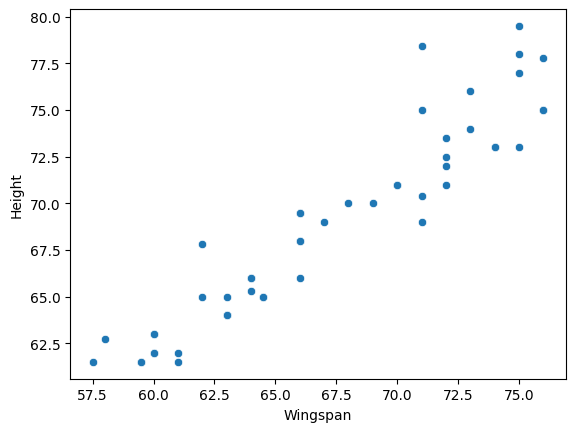

In [21]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x="Wingspan", y="Height")


<Axes: xlabel='CWDistance', ylabel='Gender'>

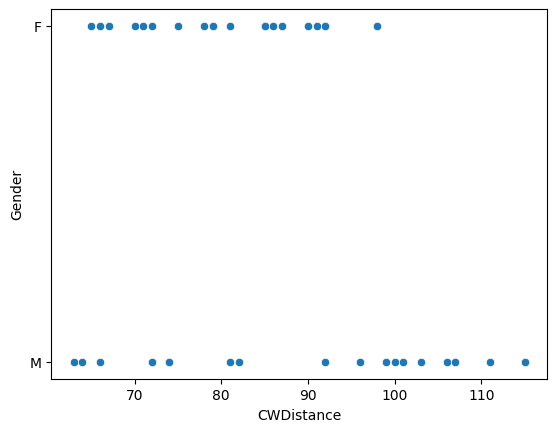

In [22]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x="CWDistance", y="Gender")


<Axes: xlabel='Wingspan', ylabel='CWDistance'>

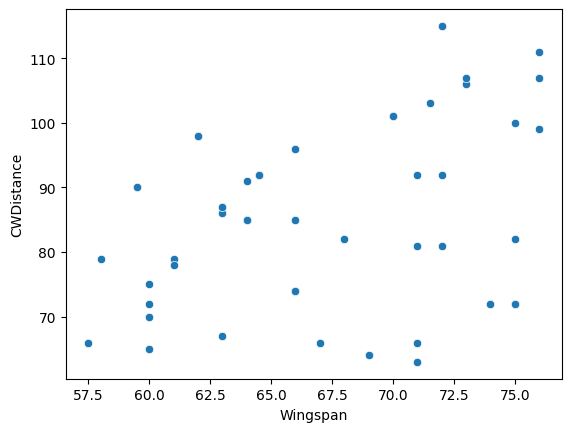

In [23]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data=df, x="Wingspan", y="CWDistance")


<Axes: xlabel='CWDistance', ylabel='Gender'>

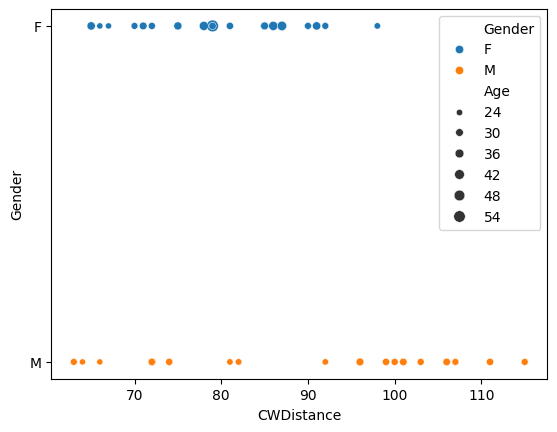

In [24]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(data=df, x="CWDistance", y="Gender", hue= "Gender", size="Age")


# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


In [25]:
#import iris 
url=Ruta+"/datasets/iris/iris.csv"

# Load the dataset
dataset = pd.read_csv(url, header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

print (dataset)

dataset.describe()

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


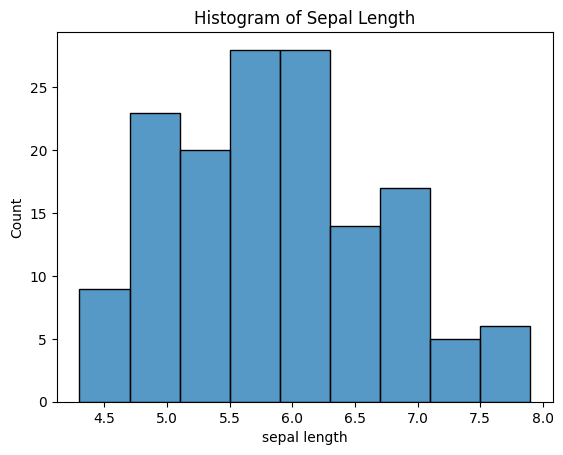

In [26]:
sns.histplot(dataset["sepal length"]).set_title("Histogram of Sepal Length")
plt.show()

Text(0.5, 1.0, 'Histogram of Sepal Width')

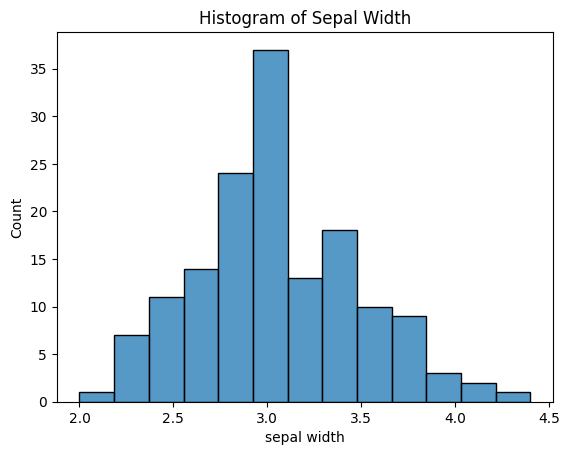

In [27]:
sns.histplot(dataset["sepal width"]).set_title("Histogram of Sepal Width")

Text(0.5, 1.0, 'Histogram of Petal Length')

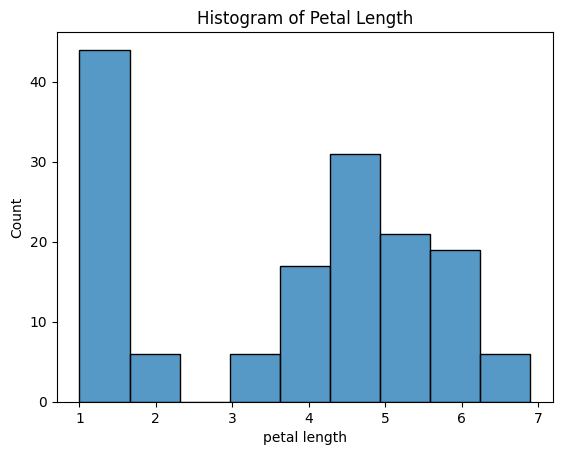

In [28]:
sns.histplot(dataset["petal length"]).set_title("Histogram of Petal Length")

Text(0.5, 1.0, 'Histogram of Petal Width')

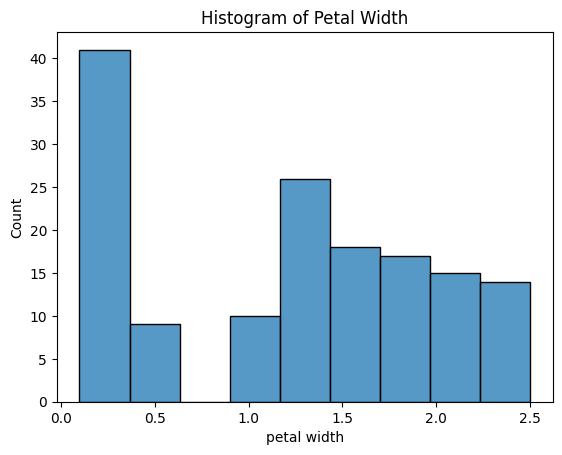

In [29]:
sns.histplot(dataset["petal width"]).set_title("Histogram of Petal Width")


3. Plot the boxplots for each of the quantitative variables

Sepal Length Boxplot:


Axes(0.125,0.11;0.775x0.77)
Sepal Width Boxplot:
Axes(0.125,0.11;0.775x0.77)
Petal Length Boxplot:
Axes(0.125,0.11;0.775x0.77)
Petal Width Boxplot:
Axes(0.125,0.11;0.775x0.77)


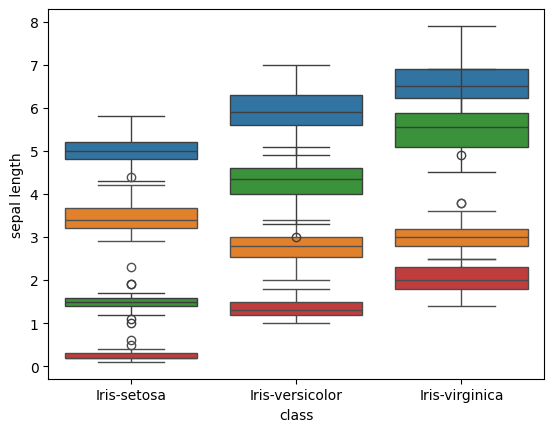

In [31]:
print("Sepal Length Boxplot:")
print(sns.boxplot(data=dataset, x="class", y="sepal length"))
print("Sepal Width Boxplot:")
print(sns.boxplot(data=dataset, x="class", y="sepal width"))

print("Petal Length Boxplot:")
print(sns.boxplot(data=dataset, x="class", y="petal length"))

print("Petal Width Boxplot:")
print(sns.boxplot(data=dataset, x="class", y="petal width"))



4. Plot the boxplots of the petal width grouped by type of flower



<Axes: xlabel='class', ylabel='sepal width'>

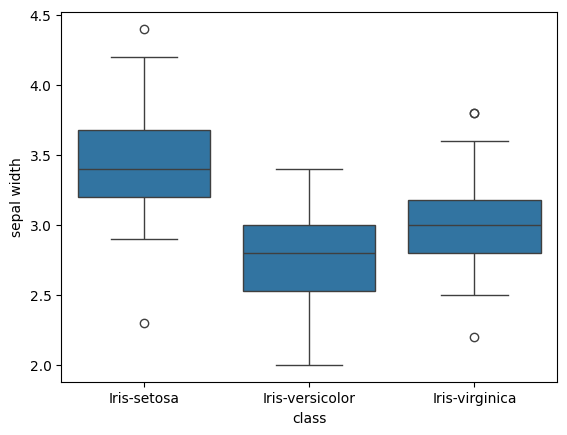

In [33]:
sns.boxplot(data=dataset, x="class", y="sepal width")


5. Plot the boxplots of the setal length grouped by type of flower

<Axes: xlabel='class', ylabel='petal length'>

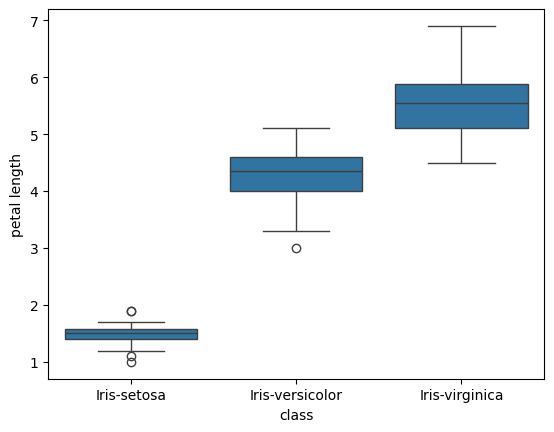

In [ ]:
sns.boxplot(data=dataset, x="class", y="petal length")

<Axes: xlabel='class', ylabel='petal width'>

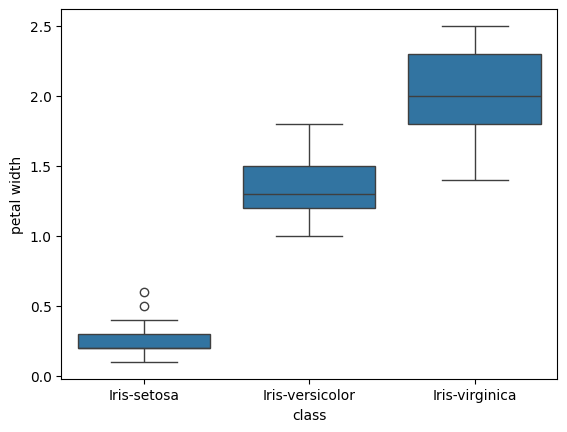

In [ ]:
sns.boxplot(data=dataset, x="class", y="petal width")


6. Provide a description (explaination from your observations) of each of the quantitative variables

As the paper states the data gathered is clear and concise allowing a straightforward analysis since the distinction among the classes portrayed can be easily made thanks to the strong correlation between variables.